In [25]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
#Load the dataset
data = pd.read_csv("ecommerce_customer_data.csv")
data

,User_ID,Gender,Age,Location,Device_Type,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
0,1,Female,23,Ahmedabad,Mobile,60,30,1,0
1,2,Male,25,Kolkata,Tablet,30,38,9,4
2,3,Male,32,Bangalore,Desktop,37,13,5,0
3,4,Male,35,Delhi,Mobile,7,20,10,3
4,5,Male,27,Bangalore,Tablet,35,20,8,2
...,...,...,...,...,...,...,...,...,...
495,496,Male,24,Mumbai,Tablet,40,45,0,0
496,497,Female,24,Hyderabad,Desktop,8,34,4,5
497,498,Male,19,Pune,Desktop,33,41,0,3
498,499,Male,28,Chennai,Desktop,6,32,7,4


In [3]:
#Data statistics summary
data.describe()

,User_ID,Age,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,26.276000,30.740000,27.182000,5.150000,2.464000
std,144.481833,5.114699,15.934246,13.071596,3.203127,1.740909
min,1.000000,18.000000,5.000000,5.000000,0.000000,0.000000
25%,125.750000,22.000000,16.000000,16.000000,2.000000,1.000000
50%,250.500000,26.000000,31.000000,27.000000,5.000000,2.000000
75%,375.250000,31.000000,44.000000,38.000000,8.000000,4.000000
max,500.000000,35.000000,60.000000,50.000000,10.000000,5.000000


In [4]:
#Data summary for non-numeric columns
data.describe(include='object')

,Gender,Location,Device_Type
count,500,500,500
unique,2,8,3
top,Male,Kolkata,Mobile
freq,261,71,178


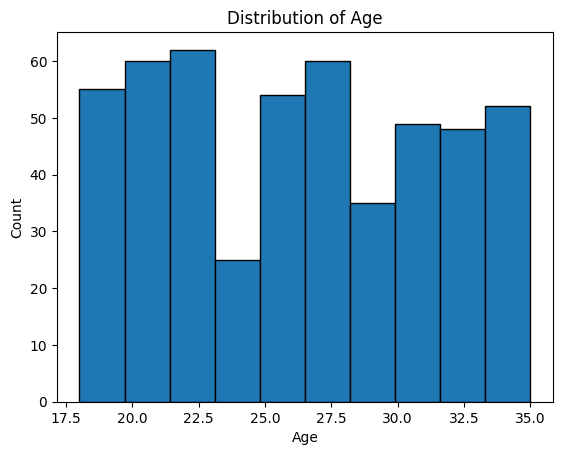

In [19]:
# Age Histogram
plt.hist(data['Age'], edgecolor='black')

# Customize the plot
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

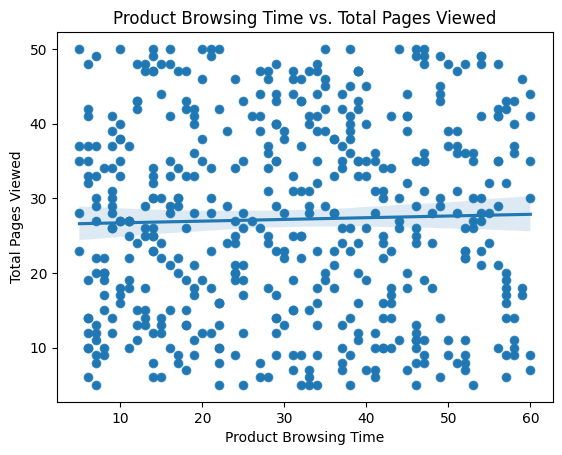

In [17]:
sns.scatterplot(x='Product_Browsing_Time', y='Total_Pages_Viewed', data=data)

# Add a trendline
sns.regplot(x='Product_Browsing_Time', y='Total_Pages_Viewed', data=data)

# Customize the plot
plt.title('Product Browsing Time vs. Total Pages Viewed')
plt.xlabel('Product Browsing Time')
plt.ylabel('Total Pages Viewed')

# Show the plot
plt.show()

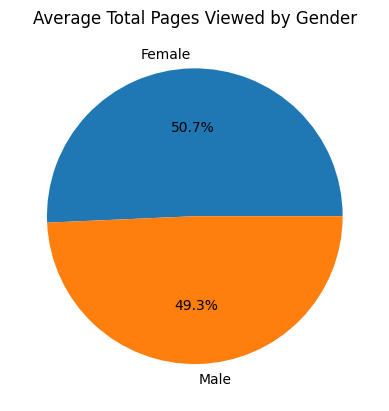

In [18]:
group_gender = data.groupby('Gender')['Total_Pages_Viewed'].mean().reset_index()
group_gender.columns = ['Gender', 'Average_Total_Pages_Viewed']
plt.pie(group_gender['Average_Total_Pages_Viewed'], labels=group_gender['Gender'], autopct='%1.1f%%')
plt.title('Average Total Pages Viewed by Gender')
plt.show()

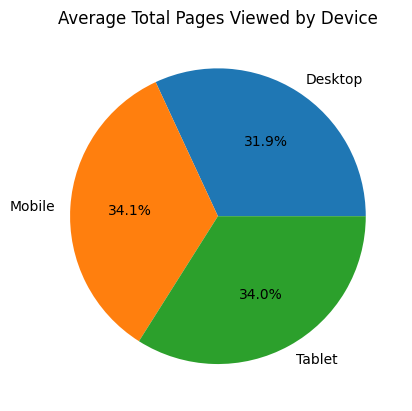

In [20]:
group_device = data.groupby('Device_Type')['Total_Pages_Viewed'].mean().reset_index()
group_device.columns = ['Device_Type', 'Average_Total_Pages_Viewed']
plt.pie(group_device['Average_Total_Pages_Viewed'], labels=group_device['Device_Type'], autopct='%1.1f%%')
plt.title('Average Total Pages Viewed by Device')
plt.show()

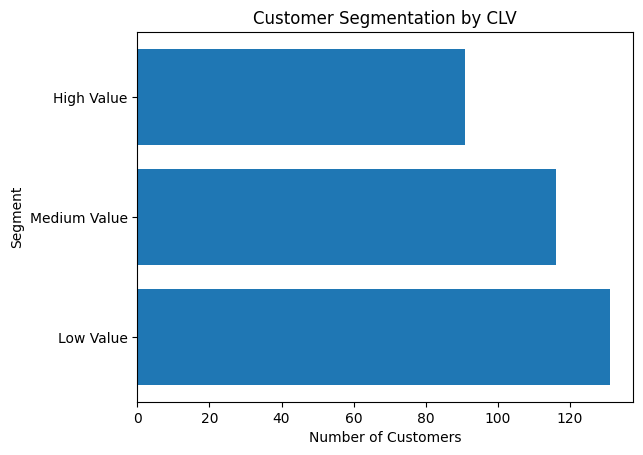

In [24]:
data['CLV'] = (data['Total_Purchases'] * data['Total_Pages_Viewed']) / data['Age']

data['Segment'] = pd.cut(data['CLV'], bins=[1, 2.5, 5, float('inf')],
                         labels=['Low Value', 'Medium Value', 'High Value'])

segment_counts = data['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

plt.barh(segment_counts['Segment'], segment_counts['Count'])
plt.xlabel('Number of Customers')
plt.ylabel('Segment')
plt.title('Customer Segmentation by CLV')
plt.show()

In [26]:
# Funnel analysis
funnel_data = data[['Product_Browsing_Time', 'Items_Added_to_Cart', 'Total_Purchases']]
funnel_data = funnel_data.groupby(['Product_Browsing_Time', 'Items_Added_to_Cart']).sum().reset_index()

fig = px.funnel(funnel_data, x='Product_Browsing_Time', y='Items_Added_to_Cart', title='Conversion Funnel')
fig.show()

In [27]:
# Calculate churn rate
data['Churned'] = data['Total_Purchases'] == 0

churn_rate = data['Churned'].mean()
print(churn_rate)

0.198
